<a href="https://colab.research.google.com/github/nguyenvietnam06/practice/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os
import shutil

src_dir = '/content/food_data/food'

# Duyệt từng file trong thư mục food
for file in os.listdir(src_dir):
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
        name = file.lower()

        # Gán class dựa vào tên
        if 'phở' in name or 'pho' in name:
            label = 'pho'
        elif 'bánh mì' in name or 'banh mi' in name:
            label = 'banh_mi'
        elif 'bún bò' in name or 'bun bo' in name:
            label = 'bun_bo'
        elif 'cơm tấm' in name or 'com tam' in name:
            label = 'com_tam'
        elif 'bún chả' in name or 'bun cha' in name:
            label = 'bun_cha'
        else:
            continue  # bỏ qua ảnh không xác định

        # Tạo thư mục nếu chưa có
        label_dir = os.path.join(src_dir, label)
        os.makedirs(label_dir, exist_ok=True)

        # Di chuyển ảnh vào thư mục class tương ứng
        shutil.move(os.path.join(src_dir, file), os.path.join(label_dir, file))

print("✅ Đã sắp xếp lại ảnh vào các folder.")


✅ Đã sắp xếp lại ảnh vào các folder.


In [7]:
for root, dirs, files in os.walk(src_dir):
    print(f"[DIR] {root}")
    for f in files[:3]:
        print(f"  - {f}")


In [10]:
# 1. Tải & giải nén file
import zipfile
import os

zip_path = '/content/food-20250414T111345Z-001.zip'
extract_path = '/content/food_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 2. Kiểm tra cấu trúc thư mục sau khi giải nén
for root, dirs, files in os.walk(extract_path):
    print(f"[DIR] {root}")
    for f in files[:3]:
        print(f"  - {f}")

# 3. Đặt đường dẫn chính xác tới folder chứa các class (món ăn)
data_dir = os.path.join(extract_path, 'food')  # thư mục food nằm trong folder giải nén

# 4. Tạo generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# 5. Xây model CNN đơn giản
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = len(train_gen.class_indices)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# 6. Compile & train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

# 7. Lưu model
model.save("vietnamese_food_model.h5")


[DIR] /content/food_data
[DIR] /content/food_data/food
  - bánh mì_3.jpg
  - bánh mì_4.jpg
  - phở_1(1).jpg
[DIR] /content/food_data/food/com_tam
  - cơm tấm_3 .jpg
  - cơm tấm_(1).jpg
  - cơm tấm_5.jpg
[DIR] /content/food_data/food/bun_bo
  - bún bò_.jpg
  - bún bò_1 .jpg
  - bún bò_(1).jpg
[DIR] /content/food_data/food/banh_mi
  - bánh mì_3.jpg
  - bánh mì_4.jpg
  - bánh mì_5 .jpg
[DIR] /content/food_data/food/pho
  - phở_1(1).jpg
  - phở_3 .jpg
  - phở_3.jpg
Found 38 images belonging to 4 classes.
Found 8 images belonging to 4 classes.
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 855ms/step - accuracy: 0.2237 - loss: 1.8755 - val_accuracy: 0.2500 - val_loss: 2.4863
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 384ms/step - accuracy: 0.1645 - loss: 3.5534 - val_accuracy: 0.2500 - val_loss: 1.4768
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step - accuracy: 0.3147 - loss: 2.1306 - val_accuracy: 0.2500 - val_loss: 1.3811
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step - accuracy: 0.3743 - loss: 

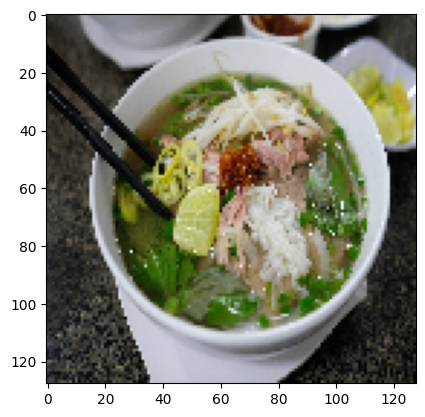

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Dự đoán món ăn: pho


In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module

# 1. Tải lại model đã lưu
model = load_model("vietnamese_food_model.h5")

# 2. Đọc ảnh mới và chuẩn bị cho việc dự đoán
img_path = '/content/Phở_bò_(39425047901).jpg'  # Đặt đường dẫn đến ảnh cần thử
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)  # Chuyển ảnh thành mảng numpy
img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch
plt.imshow(img) # Now plt is defined and can be used
plt.show()
# 3. Tiền xử lý ảnh (giống như khi training)
img_array /= 255.0  # Rescale ảnh giống như đã làm trong ImageDataGenerator

# 4. Dự đoán và in kết quả
pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)  # Nhận lớp có xác suất cao nhất

# In ra tên của món ăn dự đoán
class_names = list(train_gen.class_indices.keys())
predicted_class_name = class_names[predicted_class[0]]
print(f"Dự đoán món ăn: {predicted_class_name}")